<a href="https://colab.research.google.com/github/kiakass/recommendation/blob/main/CF_recommandation_UCF_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from surprise import Reader, Dataset

In [ ]:
movies_fn = ('https://raw.githubusercontent.com/kiakass/share/master/movies.csv')   # 9,125 건, 
ratings_fn = ('https://raw.githubusercontent.com/kiakass/share/master/ratings.csv') # 100,004 건

In [ ]:
movies=pd.read_csv(movies_fn)
ratings=pd.read_csv(ratings_fn)

### # rating-movie & data join view 

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [ ]:
pd.merge(ratings, movies, on='movieId')

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama
...,...,...,...,...,...,...
99999,664,64997,2.5,1343761859,War of the Worlds (2005),Action|Sci-Fi
100000,664,72380,3.5,1344435977,"Box, The (2009)",Drama|Horror|Mystery|Sci-Fi|Thriller
100001,665,129,3.0,995232528,Pie in the Sky (1996),Comedy|Romance
100002,665,4736,1.0,1010197684,Summer Catch (2001),Comedy|Drama|Romance


### 특정 user 기준 data 보기

In [ ]:
ratings[(ratings['userId'] == 264)].sort_values('rating',ascending=False).head()

,userId,movieId,rating,timestamp
36773,264,39,5.0,995664962
36785,264,1097,5.0,995664664
36800,264,2406,5.0,995664995
36799,264,2248,5.0,995664866
36797,264,2125,5.0,995665027


In [ ]:
df_o=ratings[(ratings['userId'] == 264)&(ratings['movieId'] == 4280)]

In [ ]:
pd.merge(df_o,movies, on='movieId').head()

,userId,movieId,rating,timestamp,title,genres
0,264,4280,4.0,995664947,"World According to Garp, The (1982)",Comedy|Drama|Romance


In [ ]:
# user 별로 얼마나 rating을 하였는지 ?
# 데이터프레임에서 한 컬럼만 뽑아낸 시리즈를 종류별로 카운트하고, 인덱스에 따라 내림차순 정렬
data = ratings['rating'].value_counts().sort_index(ascending=True)
data_g = ratings.groupby('userId')['rating'].count().reset_index().sort_values('rating',ascending=False)
data_g

,userId,rating
546,547,2391
563,564,1868
623,624,1735
14,15,1700
72,73,1610
...,...,...
295,296,20
288,289,20
248,249,20
220,221,20


### # 별점(rating) Data 분포

Text(0.5, 1.0, 'Number of ratings per user.')

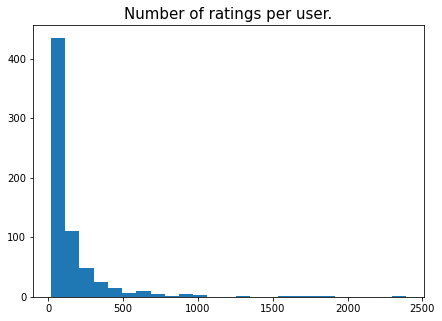

In [ ]:
plt.figure(figsize=(7,5))
a=plt.hist(data_g['rating'],25)
plt.title('Number of ratings per user.',fontsize=15)

In [ ]:
data

0.5     1101
1.0     3326
1.5     1687
2.0     7271
2.5     4449
3.0    20064
3.5    10538
4.0    28750
4.5     7723
5.0    15095
Name: rating, dtype: int64

Text(0.5, 1.0, 'Number of movies by ratings.')

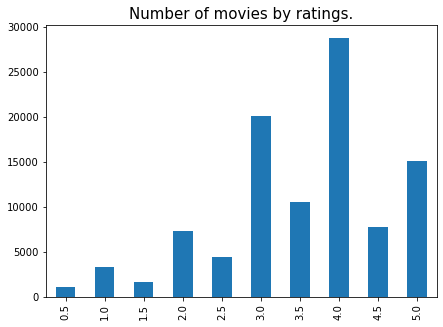

In [ ]:
plt.figure(figsize=(7,5))
data = ratings['rating'].value_counts().sort_index(ascending=True)
data.plot.bar()
plt.title('Number of movies by ratings.',fontsize=15)

### Data 처리

In [ ]:
#count()까지 Series타입이고, reset_index()까지 해서 dataframe이 된다.
ratings.groupby('userId')['rating'].count().reset_index().sort_values('rating',ascending=False)

,userId,rating
546,547,2391
563,564,1868
623,624,1735
14,15,1700
72,73,1610
...,...,...
295,296,20
288,289,20
248,249,20
220,221,20


In [ ]:
min_movie_ratings = 5
filter_movies = ratings['movieId'].value_counts() >= min_movie_ratings
filter_movies = filter_movies[filter_movies].index.tolist()

ratings_new = ratings[ratings['movieId'].isin(filter_movies)]
print('The original data frame shape:\t{}'.format(ratings.shape))
print('The new data frame shape:\t{}'.format(ratings_new.shape))

The original data frame shape:	(100004, 4)
The new data frame shape:	(90072, 4)


In [ ]:
reader= Reader(rating_scale=(0.5,5.0))

In [ ]:
reader

In [ ]:
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)

In [ ]:
data

In [ ]:
reader = Reader(rating_scale=(1,5)) # rating_scale을 명시해주는 코드.
data = Dataset.load_from_df(ratings_new[['userId', 'movieId', 'rating']], reader)

https://datart.tistory.com/11

### KNN()

In [ ]:
from surprise import KNNBasic
reader= Reader(rating_scale=(0.5,5.0))

In [ ]:
reader = Reader(rating_scale=(1,5)) # rating_scale을 명시해주는 코드.
data = Dataset.load_from_df(ratings_new[['userId', 'movieId', 'rating']], reader)

In [ ]:
# 알고리즘 : k-nearest neighbor (최근접이웃)
from surprise.model_selection import train_test_split
from surprise import accuracy

trainset, testset = train_test_split(data, test_size=0.25)
bsl_options = {'method': 'als',
               'n_epochs': 20,
               }
option = {'name' : 'pearson'}

algo = KNNBasic(bsl_options=bsl_options, sim_options=option)

# KNNBasic 알고리즘 수행
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9732


0.9731612957594798

In [ ]:
def cf_knn_pearson_recommand(userId, k_cnt, m_cnt):
    
    result=algo.get_neighbors(userId,k=k_cnt)
    print('k neighbor : ',result)
    
    rec_result=pd.DataFrame()
    
    # k_cnt 명의 user가 본 평점 5점인 영화중 n(m_cnt)개 영화를 찾음
    for k in result :
        #r1= 265
        max_rating=data.df[data.df['userId']==k]['rating'].max()
        rec_id=data.df[(data.df['rating']==max_rating) \
                       &(data.df['userId']==k)]['movieId'].head(m_cnt)
        for i in rec_id:
            k=movies[movies['movieId']==i]
            rec_result=rec_result.append(k)
        
        ## 시청한 영화를 제외함
        df_movieid_for_uid=ratings[(ratings['userId'] == userId)][['userId','movieId']]
        rec_result2 = rec_result[~rec_result['movieId'].isin(df_movieid_for_uid['movieId'])]

    return rec_result2

In [ ]:
# 추천 영화 리스트
recommand_movie_list = cf_knn_pearson_recommand(265,3,10)  # uid, k-neighbor, return movie no.
recommand_movie_list[['title','genres']]

k neighbor :  [14, 40, 58]


,title,genres
2552,Galaxy Quest (1999),Adventure|Comedy|Sci-Fi
954,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance
3367,Memento (2000),Mystery|Thriller
6248,Kiss Kiss Bang Bang (2005),Comedy|Crime|Mystery|Thriller
6539,"Departed, The (2006)",Crime|Drama|Thriller
6555,Children of Men (2006),Action|Adventure|Drama|Sci-Fi|Thriller
6556,"Prestige, The (2006)",Drama|Mystery|Sci-Fi|Thriller
6643,Hot Fuzz (2007),Action|Comedy|Crime|Mystery
8470,Her (2013),Drama|Romance|Sci-Fi
9068,10 Cloverfield Lane (2016),Thriller


In [ ]:
# userId 시청 영화 확인
def userId_wtch_movies(userId,cnt):
    userId_genre=pd.DataFrame()
    userId_genre['genre_rating']=pd.merge(ratings[(ratings['userId'] == userId)],movies, on='movieId').groupby('genres')['rating'].mean()
    userId_genre['genre_cnt']=pd.merge(ratings[(ratings['userId'] == userId)],movies, on='movieId').groupby('genres')['rating'].count()
    userId_genre_r = userId_genre.sort_values('genre_cnt',ascending=False)
    
    userId_movie_l = \
    pd.merge(ratings[(ratings['userId'] == userId)].sort_values('rating',ascending=False).head(cnt),movies, on='movieId')
    
    return userId_genre_r, userId_movie_l

### User 시청 정보 요약 

In [ ]:
genre,wtch=userId_wtch_movies(265,20)

print(genre.head(50) ,'\n')
wtch.drop(['timestamp'],axis=1)

                                  genre_rating  genre_cnt
genres                                                   
Drama                                 3.675000         40
Comedy|Drama|Romance                  4.230769         13
Drama|Romance                         3.900000         10
Drama|War                             3.800000         10
Comedy|Drama                          3.875000          8
Comedy                                3.714286          7
Drama|Mystery                         3.833333          6
Crime|Drama                           4.333333          6
Comedy|Romance                        4.250000          4
Action|Drama|War                      4.333333          3
Comedy|Drama|War                      4.000000          3
Drama|Romance|War                     4.333333          3
Drama|Western                         4.666667          3
Drama|Romance|Thriller                3.500000          2
Drama|Musical                         4.500000          2
Adventure|Dram

,userId,movieId,rating,title,genres
0,265,1944,5.0,From Here to Eternity (1953),Drama|Romance|War
1,265,936,5.0,Ninotchka (1939),Comedy|Romance
2,265,3418,5.0,Thelma & Louise (1991),Adventure|Crime|Drama
3,265,1079,5.0,"Fish Called Wanda, A (1988)",Comedy|Crime
4,265,1084,5.0,Bonnie and Clyde (1967),Crime|Drama
5,265,1096,5.0,Sophie's Choice (1982),Drama
6,265,1104,5.0,"Streetcar Named Desire, A (1951)",Drama
7,265,3201,5.0,Five Easy Pieces (1970),Drama
8,265,3200,5.0,"Last Detail, The (1973)",Comedy|Drama
9,265,1283,5.0,High Noon (1952),Drama|Western


## SVD Source 

In [ ]:
from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBasic, KNNBaseline, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering
# from sklearn.model_selection import cross_validate 사이킷런의 크로스벨리데이션이 아니다.
from surprise.model_selection import cross_validate


benchmark = []
# 모든 알고리즘을 literate화 시켜서 반복문을 실행시킨다.
#for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
for algorithm in [SVD(),KNNBasic()]:
    
    # 교차검증을 수행하는 단계.
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # 결과 저장과 알고리즘 이름 추가.
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.887312,4.419169,0.294237
KNNBasic,0.946437,0.087099,2.825109


In [ ]:
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.88193893, 0.87243302, 0.88330938]),
 'fit_time': (0.11768555641174316, 0.09470963478088379, 0.09773993492126465),
 'test_time': (0.3041858673095703, 0.226395845413208, 0.2094409465789795)}

In [ ]:
# 알고리즘 : SVD 모델 training
from surprise.model_selection import train_test_split
from surprise import accuracy

trainset, testset = train_test_split(data, test_size=0.25)

algo =  SVD(n_factors=100, n_epochs=100,random_state=123)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 0.9021


0.9020932791281736

In [ ]:
# predict 를 통해 user 에 대한 item의 평점을 예측
# user, itemid 로 평점 예측
#df_r=df[(df['uid'] == 264)].sort_values('err',ascending=True)
#recommendations = ori_movies_df[~ori_movies_df['movieId'].isin(user_history['movieId'])]
algo.predict(265,1088,)

Prediction(uid=265, iid=1088, r_ui=None, est=3.5883573523417986, details={'was_impossible': False})

In [ ]:
#def recommand_movie(df_org, uid):
df_movieid_for_uid=ratings[(ratings['userId'] == 264)][['userId','movieId']]
df_movieid_for_uid.head()

,userId,movieId
36773,264,39
36774,264,342
36775,264,356
36776,264,357
36777,264,377


In [ ]:
df_movieid_for_uid_omit=movies[~movies['movieId'].isin(df_movieid_for_uid['movieId'])]
recommand = df_movieid_for_uid_omit[['movieId']].values.reshape(-1)
recommand

array([     1,      2,      3, ..., 163949, 164977, 164979], dtype=int64)

In [ ]:
import numpy as np
recm=np.empty((1,3))
j=2
t=[1,2,3]
a,b,c,d,e=algo.predict(264,j,)
f=pd.DataFrame({'uid':a,'mid':b,'x':c,'est':d,'desc':e}).to_numpy()[0][t]
#t=[0,1,3]
#f[0][t]
f

array([2, None, 3.786466522965907], dtype=object)

In [ ]:
recm=np.empty((1,3))
t=[0,1,3] #필요 필드만 index 로 걸러냄
print(recm,recm.shape)
for j in recommand:
    a,b,c,d,e=algo.predict(264,j,)
    k=pd.DataFrame({'uid':a,'mid':b,'x':c,'est':d,'desc':e}).to_numpy()[0][t].reshape(1,3)
    recm=np.append(recm,k,axis=0)

recm = np.delete(recm, [0, -1], axis=0) #첫번째 값 초기화 필드 삭제
recm = pd.DataFrame(recm,columns=['userId','movieId','est']).sort_values('est',ascending=False).head(20)

[[3.26083326e-322 3.95252517e-323 8.45316546e-308]] (1, 3)


In [ ]:
recm=pd.DataFrame(columns=['userId','movieId','x','est','desc'])
for j in recommand:
    a,b,c,d,e=algo.predict(264,j,)
    k=pd.DataFrame({'userId':a,'movieId':b,'x':c,'est':d,'desc':e}).reset_index()
    recm=recm.append(k)

# rating 상위 20개 영화 추출
recm = recm[['userId','movieId','est']].sort_values('est',ascending=False).head(20)
print(recm)

  userId movieId       est
0    264     926  5.000000
0    264    2324  5.000000
0    264    1252  5.000000
0    264     922  5.000000
0    264    3022  5.000000
0    264    4973  5.000000
0    264    1945  5.000000
0    264    1293  5.000000
0    264    1278  5.000000
0    264     260  5.000000
0    264    2028  5.000000
0    264   71899  5.000000
0    264    1196  4.991025
0    264    2858  4.990744
0    264    1247  4.988442
0    264    1952  4.987864
0    264    5995  4.979885
0    264    1284  4.974290
0    264   54259  4.968104
0    264     899  4.961227


In [ ]:
# User 영화 추출 함수
def recommand_movie(userId,cnt):
    userId=userId
    cnt=cnt
    
    # rating 에서 시청한 userId, movieId 추출
    df_movieid_for_uid=ratings[(ratings['userId'] == userId)][['userId','movieId']]
    df_movieid_for_uid.head()
    
    # userId가 시청한 movieId 를 제외한 movieId를 추출
    df_movieid_for_uid_omit=movies[~movies['movieId'].isin(df_movieid_for_uid['movieId'])]
    recommand = df_movieid_for_uid_omit[['movieId']].values.reshape(-1)
    
    # 시청하지 않은 movieId의 점수를 예측함
    recm=pd.DataFrame(columns=['userId','movieId','x','est','desc'])
    for j in recommand:
        a,b,c,d,e=algo.predict(userId,j,)
        k=pd.DataFrame({'userId':a,'movieId':b,'x':c,'est':d,'desc':e}).reset_index()
        recm=recm.append(k)
    
    # rating 상위 20개 영화 추출
    recm = recm[['userId','movieId','est']].sort_values('est',ascending=False).head(cnt)
    print(recm)
    
    return recm

In [ ]:
# 선호 영화 예측
recm=recommand_movie(265,20)  # userId, cnt(추천콘텐츠갯수)

  userId movieId       est
0    265     745  5.000000
0    265     926  5.000000
0    265     246  4.959203
0    265     905  4.812423
0    265     501  4.811066
0    265    1192  4.809912
0    265  109374  4.782918
0    265    1288  4.782065
0    265    1148  4.766022
0    265    1272  4.747148
0    265    1218  4.746716
0    265     903  4.741739
0    265    1923  4.740551
0    265    1408  4.720840
0    265    2064  4.716604
0    265  122900  4.711377
0    265    1287  4.686222
0    265     116  4.663402
0    265    1959  4.661215
0    265   40629  4.659583


In [ ]:
# 추천 영화 List
pd.merge(recm, movies, on='movieId')

,userId,movieId,est,title,genres
0,265,745,5.000000,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy
1,265,926,5.000000,All About Eve (1950),Drama
2,265,246,4.959203,Hoop Dreams (1994),Documentary
3,265,905,4.812423,It Happened One Night (1934),Comedy|Romance
4,265,501,4.811066,Naked (1993),Drama
5,265,1192,4.809912,Paris Is Burning (1990),Documentary
6,265,109374,4.782918,"Grand Budapest Hotel, The (2014)",Comedy|Drama
7,265,1288,4.782065,This Is Spinal Tap (1984),Comedy
8,265,1148,4.766022,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime
9,265,1272,4.747148,Patton (1970),Drama|War


In [ ]:
np.set_printoptions(linewidth=np.inf)

In [ ]:
# userId 시청 영화 확인
def userId_wtch_movies(userId,cnt):
    userId_genre=pd.DataFrame()
    userId_genre['genre_rating']=pd.merge(ratings[(ratings['userId'] == userId)],movies, on='movieId').groupby('genres')['rating'].mean()
    userId_genre['genre_cnt']=pd.merge(ratings[(ratings['userId'] == userId)],movies, on='movieId').groupby('genres')['rating'].count()
    userId_genre_r = userId_genre.sort_values('genre_cnt',ascending=False)
    
    userId_movie_l = \
    pd.merge(ratings[(ratings['userId'] == userId)].sort_values('rating',ascending=False).head(cnt),movies, on='movieId')
    
    return userId_genre_r, userId_movie_l


genre,wtch=userId_wtch_movies(266,20)


print(genre ,'\n')
wtch
#data = ratings['rating'].value_counts().sort_index(ascending=True)
#ratings.groupby('userId')['rating'].count().reset_index().sort_values('rating',ascending=False)
#pd.merge(ratings[(ratings['userId'] == 266)].sort_values('rating',ascending=False).head(20),movies, on='movieId')

In [ ]:
genre

In [ ]:

def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(movieId):
    """ return number of users that have rated given item
    args:
      movieId: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(movieId)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'movieId', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.movieId.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [ ]:
#df['uid'==264]
df_r=df[(df['uid'] == 264)].sort_values('err',ascending=True)
df_r

In [ ]:
# 본것들을 걸러내는 작업이 필요함
df_rec=pd.merge(df_r,movies,on='movieId')

In [ ]:
df_rec

In [ ]:
predictions

In [ ]:
df_o=ratings[(ratings['userId'] == 264)]
df_o